<a href="https://colab.research.google.com/github/ashmeenkhaira/Machine-learning-/blob/main/image_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install tensorflow tensorflow-gpu opencv-python matplotlib

  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [2]:
!pip list

Package                            Version
---------------------------------- -------------------
absl-py                            1.4.0
accelerate                         1.3.0
aiohappyeyeballs                   2.6.1
aiohttp                            3.11.13
aiosignal                          1.3.2
alabaster                          1.0.0
albucore                           0.0.23
albumentations                     2.0.5
ale-py                             0.10.2
altair                             5.5.0
annotated-types                    0.7.0
anyio                              3.7.1
argon2-cffi                        23.1.0
argon2-cffi-bindings               21.2.0
array_record                       0.7.1
arviz                              0.20.0
astropy                            7.0.1
astropy-iers-data                  0.2025.3.10.0.29.26
astunparse                         1.6.3
atpublic                           4.1.0
attrs                              25.3.0
audioread          

In [3]:
import tensorflow as tf
import os

In [4]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [5]:
tf.config.list_physical_devices('GPU')

[]

Removing doggy images

In [6]:
import cv2
import imghdr

<ipython-input-6-290956b76b78>:2: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


In [7]:
data_dir = 'data'

In [8]:
os.listdir(data_dir)

['.ipynb_checkpoints', 'sad', 'happy']

In [9]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [10]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

In [11]:
import numpy as np
from matplotlib import pyplot as plt

In [12]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 171 files belonging to 2 classes.


In [13]:
data_iterator = data.as_numpy_iterator()

In [14]:
batch = data_iterator.next()

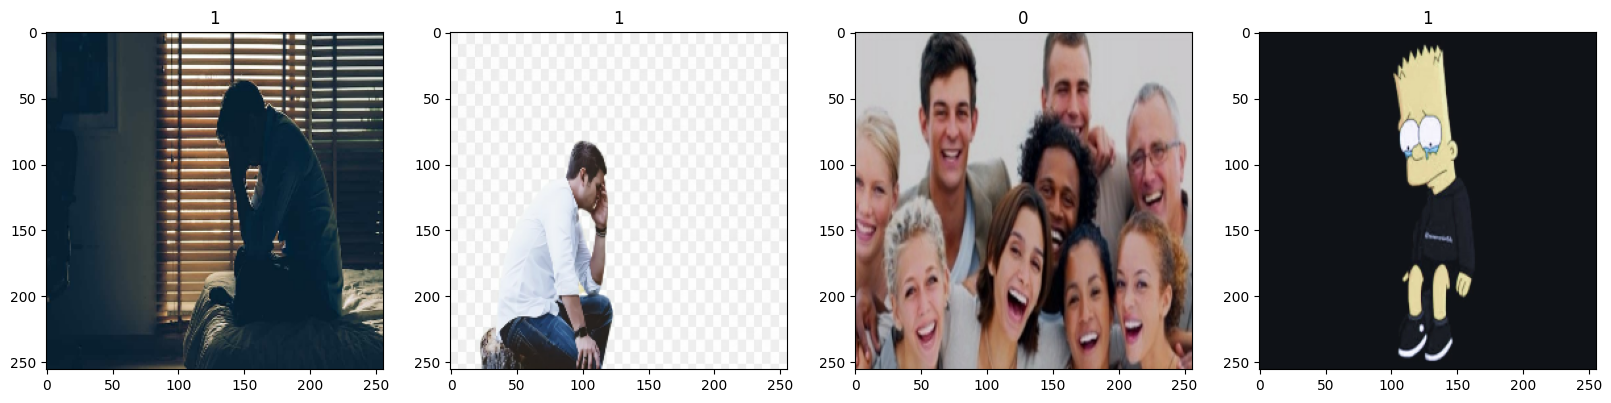

In [15]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [16]:
data = data.map(lambda x,y: (x/255, y))

In [17]:
data.as_numpy_iterator().next()

(array([[[[0.9616678 , 0.9518076 , 0.92769605],
          [0.97753537, 0.9842449 , 0.9635035 ],
          [0.9845714 , 0.99416083, 0.9806498 ],
          ...,
          [0.8745098 , 0.9137255 , 0.91764706],
          [0.8745098 , 0.9137255 , 0.91764706],
          [0.87058824, 0.9098039 , 0.9137255 ]],
 
         [[0.93878675, 0.92587316, 0.87863827],
          [0.968804  , 0.9726796 , 0.94828504],
          [0.98089767, 0.9887408 , 0.98365504],
          ...,
          [0.8745098 , 0.9137255 , 0.91764706],
          [0.8745098 , 0.9137255 , 0.91764706],
          [0.87058824, 0.9098039 , 0.9137255 ]],
 
         [[0.905924  , 0.87919575, 0.80807567],
          [0.96450794, 0.95247453, 0.92862463],
          [0.9724724 , 0.97915137, 0.9758119 ],
          ...,
          [0.8745098 , 0.9137255 , 0.91764706],
          [0.8745098 , 0.9137255 , 0.91764706],
          [0.87058824, 0.9098039 , 0.9137255 ]],
 
         ...,
 
         [[0.15685843, 0.17902724, 0.14818104],
          [0.51203

In [52]:
train_size = int(len(data)*.6)
val_size = int(len(data)*.3)
test_size = int(len(data)*.1)

In [53]:
train_size

3

In [54]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [55]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [56]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [57]:
model = Sequential()

In [58]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [59]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [60]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 254, 254, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 127, 127, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 125, 125, 32)        │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 62, 62, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 60, 60, 16)          │           4,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 30, 30, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 14400)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │       3,686,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

In [61]:
logdir='logs'

In [62]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [63]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 13s 3s/step - accuracy: 0.4948 - loss: 1.0304 - val_accuracy: 0.4688 - val_loss: 0.7038
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 20s 3s/step - accuracy: 0.3776 - loss: 0.7172 - val_accuracy: 0.5938 - val_loss: 0.6313
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 20s 3s/step - accuracy: 0.5729 - loss: 0.6619 - val_accuracy: 0.4688 - val_loss: 0.6353
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 9s 3s/step - accuracy: 0.6667 - loss: 0.5477 - val_accuracy: 0.7812 - val_loss: 0.5056
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 10s 3s/step - accuracy: 0.8320 - loss: 0.4517 - val_accuracy: 0.8438 - val_loss: 0.3950
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 10s 3s/step - accuracy: 0.7122 - loss: 0.4833 - val_accuracy: 0.7812 - val_loss: 0.3631
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 10s 4s/step - accuracy: 0.7812 - loss: 0.4120 - val_accuracy: 0.8125 - val_loss: 0.4825
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 10s 3s/step - accuracy: 0.8997 - loss: 0.4028 - val_accuracy: 0.9062 - val_loss: 0.3276
Epoch 9/2

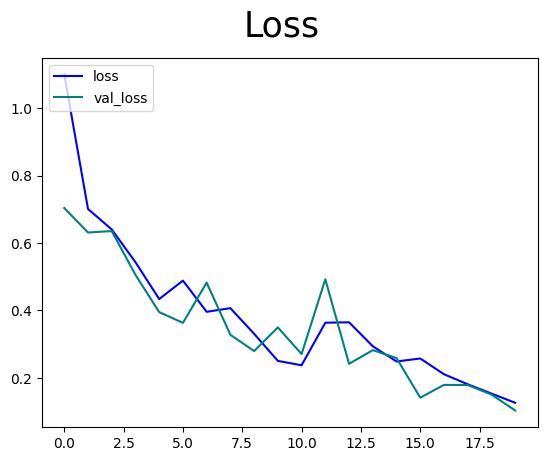

In [64]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='blue', label='loss')
plt.plot(hist.history['val_loss'], color='teal', label='val_loss')
fig.suptitle('Loss', fontsize=25)
plt.legend(loc="upper left")
plt.show()

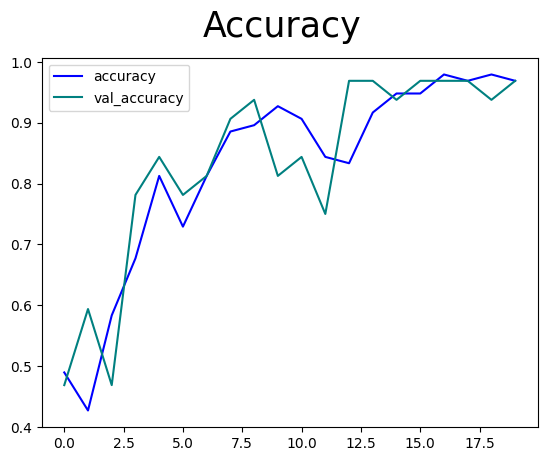

In [65]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='blue', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='teal', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=25)
plt.legend(loc="upper left")
plt.show()

In [66]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [67]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [68]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

In [69]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(0.0, shape=(), dtype=float32) tf.Tensor(0.0, shape=(), dtype=float32) tf.Tensor(0.0, shape=(), dtype=float32)


In [70]:
import cv2

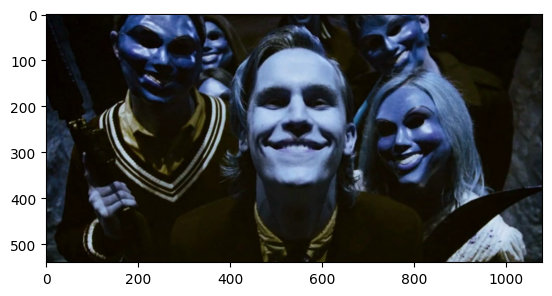

In [71]:
img = cv2.imread('/content/data/happy/07-120104-happy_people_are_not_nice_people.jpg')
plt.imshow(img)
plt.show()

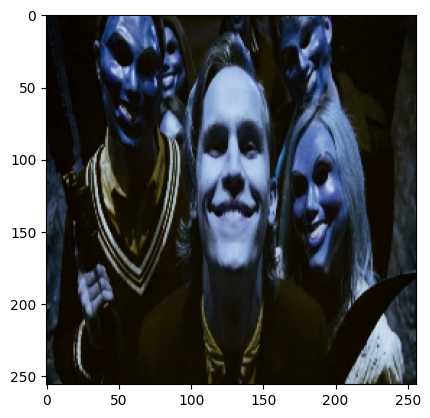

In [72]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [73]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


In [74]:
yhat

array([[0.18843408]], dtype=float32)

In [75]:
if yhat > 0.5:
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Happy


In [76]:
from tensorflow.keras.models import load_model

In [78]:
model.save(os.path.join('models','imageclassifier.h5'))

In [79]:
new_model = load_model(os.path.join('models','imageclassifier.h5'))

In [80]:
new_model.predict(np.expand_dims(resize/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


array([[0.18843408]], dtype=float32)